In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_electricity = pd.read_csv('electricity_data_nl_2022_2024_hourly_flow.csv', index_col=0, parse_dates=True)
df_weather = pd.read_csv('hist_weather_data_2022-2024_app_temp2025-03-19T09-46-18+00-00.csv', index_col=0, parse_dates=True)
df_weather_debilt = df_weather[df_weather['location'] == 'DeBilt']

In [3]:
df_electricity.index = pd.to_datetime(df_electricity.index)
df_weather_debilt.index = pd.to_datetime(df_weather_debilt.index)

merged_df_elec_weather = pd.merge(df_electricity, df_weather_debilt, left_index=True, right_index=True, how='inner')

In [4]:
# Define the base file path and the list of file suffixes (23, 31, 53, 54, 55, 56= empty)
base_file_path = '../../src/data/ned-api/csv-hr-data/power-gen-type-2022-2024-'
file_suffixes = [1, 2, 4, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 35, 50, 51]
merged_df_total = merged_df_elec_weather.copy()

# Iterate over the file suffixes and merge the data
for suffix in file_suffixes:
    file_path = f'{base_file_path}{suffix}.csv'
    df = pd.read_csv(file_path, parse_dates=['validto'], index_col='validto')

# Rename the columns to avoid conflicts
    df = df.rename(columns={'capacity': f'capacity_{suffix}', 'volume': f'volume_{suffix}'})

# Merge the data on the index (time)
    merged_df_total = pd.merge(merged_df_total, df[[f'capacity_{suffix}', f'volume_{suffix}']], left_index=True, right_index=True, how='left')
    
df_filtered = merged_df_total.loc['2022-01-01':'2023-12-31']
df_filtered.head


<bound method NDFrame.head of                                Load   Price  Flow_BE_to_NL  Flow_NL_to_BE  \
2022-01-01 00:00:00+00:00  10249.75  124.70            0.0          728.0   
2022-01-01 01:00:00+00:00   9907.00  134.00            0.0         1070.0   
2022-01-01 02:00:00+00:00   9782.50   58.80            0.0          344.0   
2022-01-01 03:00:00+00:00   9589.75   37.67            0.0          154.0   
2022-01-01 04:00:00+00:00   9508.00   39.70          352.0            0.0   
...                             ...     ...            ...            ...   
2023-12-31 19:00:00+00:00  12919.50   34.89         1709.0            0.0   
2023-12-31 20:00:00+00:00  12269.00   13.30         1579.0            0.0   
2023-12-31 21:00:00+00:00  11774.25   10.68          819.0            0.0   
2023-12-31 22:00:00+00:00  11458.00    3.17          934.0            0.0   
2023-12-31 23:00:00+00:00  11273.25    0.10          676.0            0.0   

                           Flow_DE_to_NL  Flo

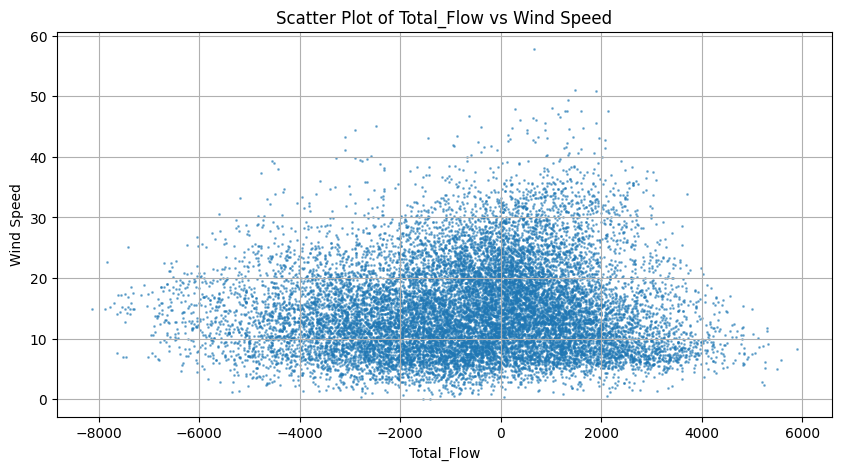

In [73]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Total_Flow'], df_filtered['wind_speed_10m'], s=1, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Total_Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Total_Flow vs Wind Speed')
plt.grid(True)
plt.show()

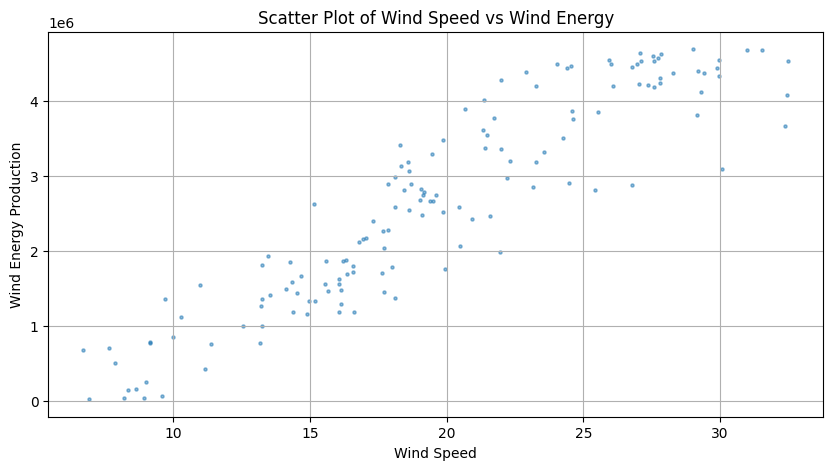

In [74]:
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['wind_speed_10m'], df_filtered['volume_1'], s=5, alpha=0.5)  # Adjust 's' for point size
plt.xlabel('Wind Speed')
plt.ylabel('Wind Energy Production')
plt.title('Scatter Plot of Wind Speed vs Wind Energy')
plt.grid(True)
plt.show()

In [75]:
import numpy as np

# Drop rows with missing values in 'Price' or 'Load' columns
df_filtered_ws = df_filtered[['volume_1', 'wind_speed_10m']].dropna()

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered_ws['volume_1'], df_filtered_ws['wind_speed_10m'])
print("Correlation coefficient matrix:")
print(r)

Correlation coefficient matrix:
[[1.         0.91802559]
 [0.91802559 1.        ]]


In [77]:
print(df_filtered.columns)

Index(['Load', 'Price', 'Flow_BE_to_NL', 'Flow_NL_to_BE', 'Flow_DE_to_NL',
       'Flow_NL_to_DE', 'Flow_GB_to_NL', 'Flow_NL_to_GB', 'Flow_DK_to_NL',
       'Flow_NL_to_DK', 'Flow_NO_to_NL', 'Flow_NL_to_NO', 'Flow_BE', 'Flow_DE',
       'Flow_GB', 'Flow_DK', 'Flow_NO', 'Total_Flow', 'temperature_2m',
       'apparent_temperature', 'cloud_cover', 'wind_speed_10m',
       'diffuse_radiation', 'direct_normal_irradiance', 'shortwave_radiation',
       'wind_speed_100m', 'location', 'capacity_1', 'volume_1', 'capacity_2',
       'volume_2', 'capacity_4', 'volume_4', 'capacity_8', 'volume_8',
       'capacity_9', 'volume_9', 'capacity_10', 'volume_10', 'capacity_11',
       'volume_11', 'capacity_12', 'volume_12', 'capacity_13', 'volume_13',
       'capacity_14', 'volume_14', 'capacity_17', 'volume_17', 'capacity_18',
       'volume_18', 'capacity_19', 'volume_19', 'capacity_20', 'volume_20',
       'capacity_21', 'volume_21', 'capacity_22', 'volume_22', 'capacity_24',
       'volume_24', 'c

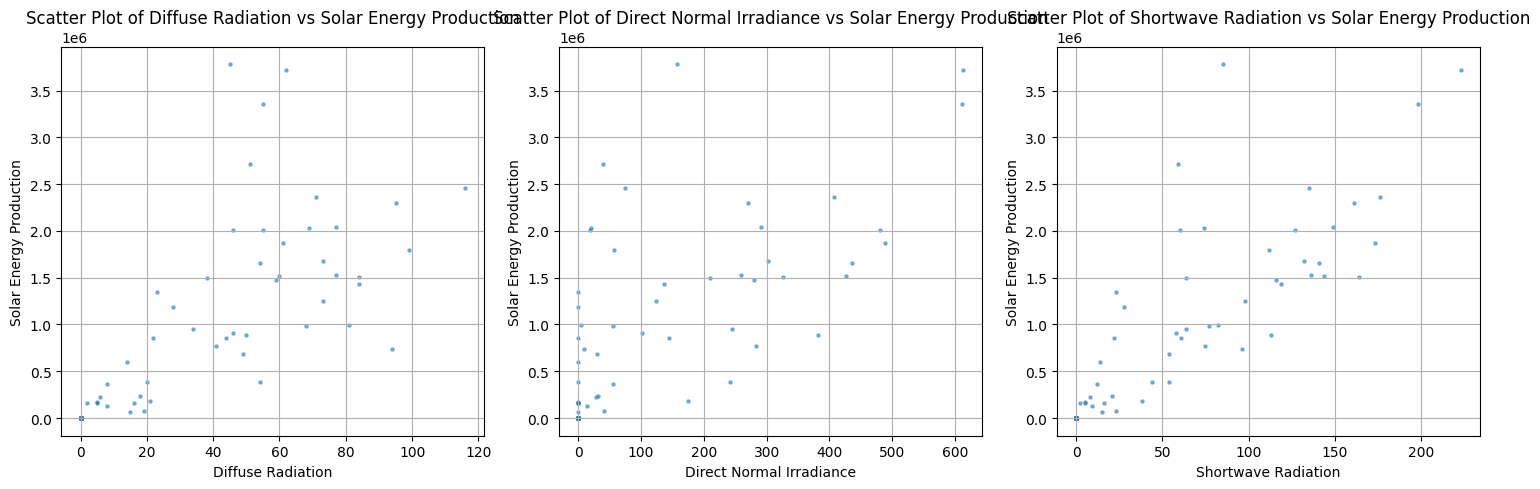

In [78]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for 'diffuse_radiation'
axs[0].scatter(df_filtered['diffuse_radiation'], df_filtered['volume_2'], s=5, alpha=0.5)
axs[0].set_xlabel('Diffuse Radiation')
axs[0].set_ylabel('Solar Energy Production')
axs[0].set_title('Scatter Plot of Diffuse Radiation vs Solar Energy Production')
axs[0].grid(True)

# Scatter plot for 'direct_normal_irradiance'
axs[1].scatter(df_filtered['direct_normal_irradiance'], df_filtered['volume_2'], s=5, alpha=0.5)
axs[1].set_xlabel('Direct Normal Irradiance')
axs[1].set_ylabel('Solar Energy Production')
axs[1].set_title('Scatter Plot of Direct Normal Irradiance vs Solar Energy Production')
axs[1].grid(True)

# Scatter plot for 'shortwave_radiation'
axs[2].scatter(df_filtered['shortwave_radiation'], df_filtered['volume_2'], s=5, alpha=0.5)
axs[2].set_xlabel('Shortwave Radiation')
axs[2].set_ylabel('Solar Energy Production')
axs[2].set_title('Scatter Plot of Shortwave Radiation vs Solar Energy Production')
axs[2].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import plotly.express as px

# Select the desired columns
selected_columns = [
    'Load', 'Price', 'Total_Flow', 'temperature_2m', 'apparent_temperature', 
    'cloud_cover', 'wind_speed_10m', 'diffuse_radiation', 'direct_normal_irradiance', 
    'shortwave_radiation', 'wind_speed_100m', 'location', 'volume_1', 'volume_2', 
    'volume_4', 'volume_8', 'volume_9', 'volume_10', 'volume_11', 'volume_12', 
    'volume_13', 'volume_14', 'volume_17', 'volume_18', 'volume_19', 'volume_20', 
    'volume_21', 'volume_22', 'volume_24', 'volume_25', 'volume_26', 'volume_27', 
    'volume_28', 'volume_35', 'volume_50', 'volume_51'
]

# Filter the DataFrame to include only the selected columns
df_selected = df_filtered[selected_columns]

# Select only the numerical columns
df_numeric = df_selected.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(corr_matrix, 
                labels=dict(color="Correlation"), 
                x=corr_matrix.columns, 
                y=corr_matrix.columns,
                color_continuous_scale='RdBu_r',
                zmin=-1, zmax=1)

fig.update_layout(title='Correlation Matrix', width=800, height=800)

# Save the figure as an HTML file
fig.write_html("correlation_matrix.html")

# Display a message to the user
print("The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.")

The interactive correlation matrix has been saved as 'correlation_matrix.html'. Open this file in your browser to view it.


C:\Users\shba\AppData\Local\Temp\ipykernel_15428\443191409.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors


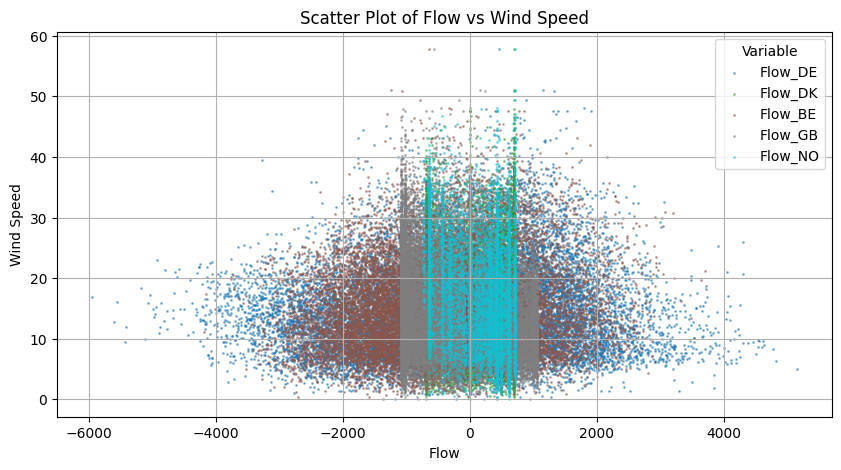

In [11]:
# Define a color map for the variables
colors = plt.cm.get_cmap('tab10', 5)  # Use a colormap with 5 distinct colors

# Plot the scatter plot with different colors for each variable
plt.figure(figsize=(10, 5))
plt.scatter(df_filtered['Flow_DE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(0), label='Flow_DE')
plt.scatter(df_filtered['Flow_DK'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(1), label='Flow_DK')
plt.scatter(df_filtered['Flow_BE'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(2), label='Flow_BE')
plt.scatter(df_filtered['Flow_GB'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(3), label='Flow_GB')
plt.scatter(df_filtered['Flow_NO'], df_filtered['wind_speed_10m'], s=1, alpha=0.5, color=colors(4), label='Flow_NO')

plt.xlabel('Flow')
plt.ylabel('Wind Speed')
plt.title('Scatter Plot of Flow vs Wind Speed')
plt.legend(title='Variable')
plt.grid(True)
plt.show()

In [12]:
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
print(nan_totalflow)
nan_temp = df_filtered['temperature_2m'].isna().sum()
print(nan_temp)
nan_cloud = df_filtered['cloud_cover'].isna().sum()
print(nan_cloud)

2
0
0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for missing values in the relevant columns
nan_totalflow = df_filtered['Total_Flow'].isna().sum()
nan_temp = df_filtered['temperature_2m'].isna().sum()
nan_cloud = df_filtered['cloud_cover'].isna().sum()
nan_wind = df_filtered['wind_speed_10m'].isna().sum()
nan_direct_normal_irradiance = df_filtered['direct_normal_irradiance'].isna().sum()

print(f"Missing values in Total_Flow: {nan_totalflow}")
print(f"Missing values in temperature_2m: {nan_temp}")
print(f"Missing values in cloud_cover: {nan_cloud}")
print(f"Missing values in wind_speed_10m: {nan_wind}")
print(f"Missing values in direct_normal_irradiance: {nan_direct_normal_irradiance}")

# Drop rows with missing values in the relevant columns
df_filtered = df_filtered[['Price', 'Total_Flow', 'temperature_2m', 'cloud_cover', 'wind_speed_10m', 'direct_normal_irradiance']].dropna()

# Define the features (X) and the target (y)
X = df_filtered[['Total_Flow', 'temperature_2m', 'cloud_cover', 'wind_speed_10m', 'direct_normal_irradiance']]
y = df_filtered['Price']

# Train the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Missing values in Total_Flow: 2
Missing values in temperature_2m: 0
Missing values in cloud_cover: 0
Missing values in wind_speed_10m: 0
Missing values in direct_normal_irradiance: 0
Mean Squared Error: 12896.935640866624
R^2 Score: 0.15103373185578173
